In [28]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [29]:
#Making a dataset
ds = pd.read_csv("Global_Pollution_Analysis (1).csv")
ds.head()

,Country,Year,Air_Pollution_Index,Water_Pollution_Index,Soil_Pollution_Index,Industrial_Waste (in tons),Energy_Recovered (in GWh),CO2_Emissions (in MT),Renewable_Energy (%),Plastic_Waste_Produced (in tons),Energy_Consumption_Per_Capita (in MWh),Population (in millions),GDP_Per_Capita (in USD)
0,Hungary,2005,272.70,124.27,51.95,94802.83,158.14,5.30,41.11,37078.88,12.56,42.22,20972.96
1,Singapore,2001,86.72,60.34,117.22,56283.92,498.04,6.34,36.44,33128.20,5.23,137.25,34850.41
2,Romania,2016,91.59,83.36,121.72,56256.02,489.51,49.69,9.38,18803.46,13.15,124.47,57773.15
3,Cook Islands,2018,280.61,67.16,93.58,74864.73,145.18,8.91,18.97,9182.27,0.78,67.80,21837.51
4,Djibouti,2008,179.16,127.53,121.55,76862.06,40.38,14.93,34.00,39235.12,12.84,186.52,41379.37


In [30]:
ds.shape

(200, 13)

In [31]:
ds = ds.dropna()
ds.shape
#Shape remains same no null data

(200, 13)

In [32]:
#Normalizing data
dsscaling = ds.drop(['Country','Year'],axis=1)

from sklearn.preprocessing import Normalizer
N = Normalizer()
ds[['Air_Pollution_Index',	'Water_Pollution_Index',	'Soil_Pollution_Index',	'Industrial_Waste (in tons)'	,'Energy_Recovered (in GWh)',	'CO2_Emissions (in MT)',	'Renewable_Energy (%)'	,
    'Plastic_Waste_Produced (in tons)',	'Energy_Consumption_Per_Capita (in MWh)'	,'Population (in millions)'	,'GDP_Per_Capita (in USD)']]=N.fit_transform(
ds[['Air_Pollution_Index','Water_Pollution_Index','Soil_Pollution_Index','Industrial_Waste (in tons)','Energy_Recovered (in GWh)','CO2_Emissions (in MT)',	'Renewable_Energy (%)'	,
    'Plastic_Waste_Produced (in tons)','Energy_Consumption_Per_Capita (in MWh)','Population (in millions)'	,'GDP_Per_Capita (in USD)']])

ds.head()


,Country,Year,Air_Pollution_Index,Water_Pollution_Index,Soil_Pollution_Index,Industrial_Waste (in tons),Energy_Recovered (in GWh),CO2_Emissions (in MT),Renewable_Energy (%),Plastic_Waste_Produced (in tons),Energy_Consumption_Per_Capita (in MWh),Population (in millions),GDP_Per_Capita (in USD)
0,Hungary,2005,0.002624,0.001196,0.000500,0.912139,0.001522,0.000051,0.000396,0.356752,0.000121,0.000406,0.201790
1,Singapore,2001,0.001171,0.000815,0.001583,0.760302,0.006728,0.000086,0.000492,0.447507,0.000071,0.001854,0.470771
2,Romania,2016,0.001106,0.001007,0.001470,0.679396,0.005912,0.000600,0.000113,0.227087,0.000159,0.001503,0.697718
3,Cook Islands,2018,0.003574,0.000855,0.001192,0.953398,0.001849,0.000113,0.000242,0.116936,0.000010,0.000863,0.278099
4,Djibouti,2008,0.001872,0.001333,0.001270,0.803111,0.000422,0.000156,0.000355,0.409957,0.000134,0.001949,0.432362


In [33]:
#I am not labeling country instead I am making countries as index.
ds.set_index('Country', inplace=True)
ds.head()

,Year,Air_Pollution_Index,Water_Pollution_Index,Soil_Pollution_Index,Industrial_Waste (in tons),Energy_Recovered (in GWh),CO2_Emissions (in MT),Renewable_Energy (%),Plastic_Waste_Produced (in tons),Energy_Consumption_Per_Capita (in MWh),Population (in millions),GDP_Per_Capita (in USD)
Country,,,,,,,,,,,,
Hungary,2005,0.002624,0.001196,0.000500,0.912139,0.001522,0.000051,0.000396,0.356752,0.000121,0.000406,0.201790
Singapore,2001,0.001171,0.000815,0.001583,0.760302,0.006728,0.000086,0.000492,0.447507,0.000071,0.001854,0.470771
Romania,2016,0.001106,0.001007,0.001470,0.679396,0.005912,0.000600,0.000113,0.227087,0.000159,0.001503,0.697718
Cook Islands,2018,0.003574,0.000855,0.001192,0.953398,0.001849,0.000113,0.000242,0.116936,0.000010,0.000863,0.278099
Djibouti,2008,0.001872,0.001333,0.001270,0.803111,0.000422,0.000156,0.000355,0.409957,0.000134,0.001949,0.432362


In [34]:
#making a pollution severity column
ds['Total Pollution'] = ds['Air_Pollution_Index']+ds['Water_Pollution_Index']+ds['Soil_Pollution_Index']

#pollution mean
pollution_mean = ds['Total Pollution'].mean()
print(pollution_mean)


#Making a pollution severity column
def classifySeverity(value):
    if abs(value - pollution_mean) <= 0.001:
        return 'moderate'
    elif value<pollution_mean:
        return 'low'
    else:
        return 'high'
    

ds['severity'] = ds['Total Pollution'].apply(classifySeverity)
ds['severity'].value_counts()

0.0057999772235529145


severity
low         94
moderate    59
high        47
Name: count, dtype: int64

In [37]:
# encoding severity
from sklearn.preprocessing import LabelEncoder
lEncoder = LabelEncoder()
ds['severity'] = Lencoder.fit_transform(ds['severity'])
ds['severity'].value_counts()
#Means 1 his low 2 is Moderate and 0 is high



NameError: name 'Lencoder' is not defined

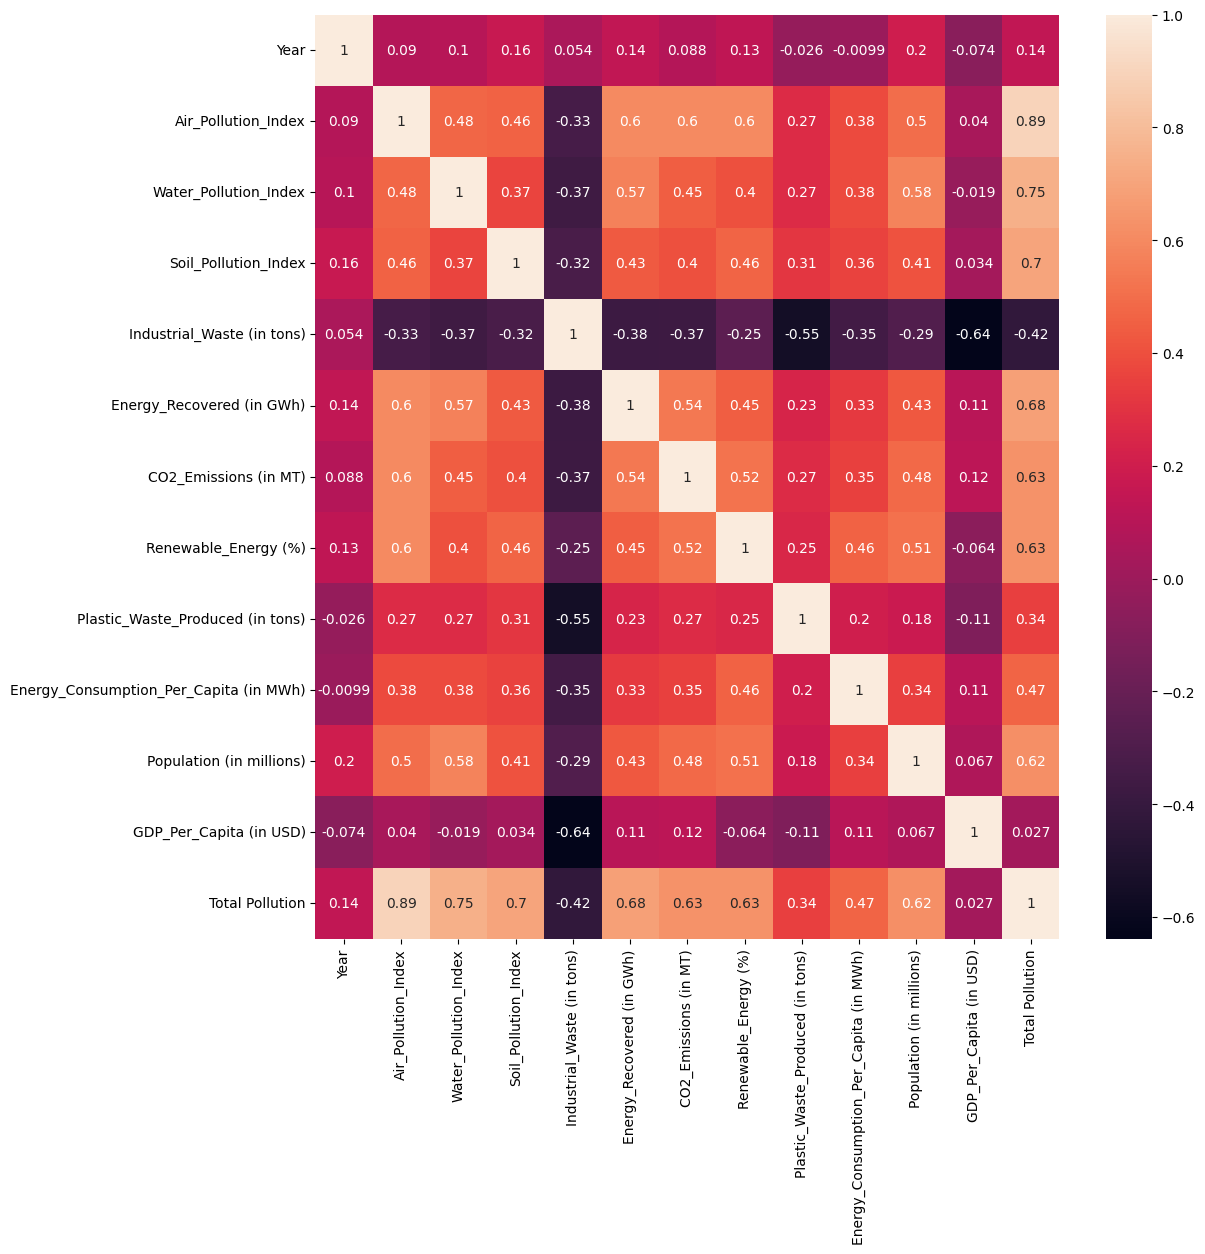

In [38]:
#Checking correlation
plt.figure(figsize=(12,12))
sns.heatmap(ds.corr(numeric_only=True),annot=True)
plt.show()

Classification Report:                precision    recall  f1-score   support

        high       0.80      0.59      0.68        34
         low       0.83      0.92      0.87        64
    moderate       0.59      0.62      0.60        42

    accuracy                           0.75       140
   macro avg       0.74      0.71      0.72       140
weighted avg       0.75      0.75      0.75       140

Accuracy Report:  75.0


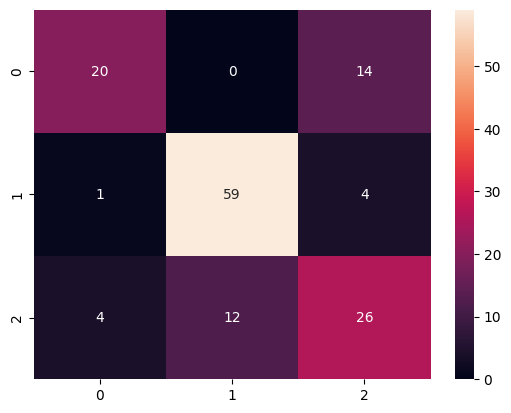

In [98]:
#Taking feature from correlation matrix
X=ds[['Population (in millions)','Air_Pollution_Index','Industrial_Waste (in tons)']]
Y=ds['severity']

#binning features
from sklearn.preprocessing import KBinsDiscretizer
binner = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
X_binned = binner.fit_transform(X)

#Splitting data
from sklearn.model_selection import train_test_split
x_test,x_train,y_test,y_train = train_test_split(X_binned,Y,test_size=0.3)

#Making model
from sklearn.naive_bayes import MultinomialNB
Nb = MultinomialNB()
a=Nb.fit(x_train,y_train)
y_predict = a.predict(x_test)

#Evaluating output
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
print("Classification Report: ",classification_report(y_test,y_predict))
print("Accuracy Report: ",accuracy_score(y_test,y_predict)*100)

sns.heatmap(confusion_matrix(y_test,y_predict),annot=True)
plt.show()


In [102]:
#K-Nearest Neighbors (KNN)
#Splitting data using the same feature vectors

x_train2,x_test2,y_train2,y_test2 = train_test_split(X,Y,test_size=0.3)

#making a knn model
from sklearn.neighbors import KNeighborsClassifier
Knn = KNeighborsClassifier(n_neighbors=2)
Knn2 = KNeighborsClassifier(n_neighbors=5)
a = Knn.fit(x_train2,y_train2)
a2=Knn2.fit(x_train2,y_train2)
y_predictknn = a.predict(x_test2)
y_predictknn2=a2.predict(x_test2)

#Getting stats for knn
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
print("Stats of knn model with k=2\n", classification_report(y_test2,y_predictknn))
print("Stats of knn model with k=5\n", classification_report(y_test2,y_predictknn2))


print("Accuracy of knn model with k=2", accuracy_score(y_test2,y_predictknn)*100)
print("Accuracy of knn model with k=5", accuracy_score(y_test2,y_predictknn2)*100)



Stats of knn model with k=2
               precision    recall  f1-score   support

        high       0.26      0.64      0.37        11
         low       0.58      0.52      0.55        29
    moderate       0.29      0.10      0.15        20

    accuracy                           0.40        60
   macro avg       0.37      0.42      0.35        60
weighted avg       0.42      0.40      0.38        60

Stats of knn model with k=5
               precision    recall  f1-score   support

        high       0.32      0.55      0.40        11
         low       0.67      0.62      0.64        29
    moderate       0.57      0.40      0.47        20

    accuracy                           0.53        60
   macro avg       0.52      0.52      0.50        60
weighted avg       0.57      0.53      0.54        60

Accuracy of knn model with k=2 40.0
Accuracy of knn model with k=5 53.333333333333336


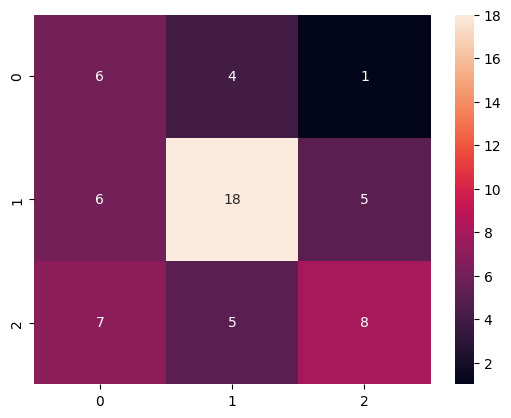

In [103]:
#k =5 is performing good than 2 so we will use 5

sns.heatmap(confusion_matrix(y_test2,y_predictknn2),annot=True)
plt.show()

Stats of valid prediction:
               precision    recall  f1-score   support

        high       1.00      0.75      0.86         8
         low       1.00      0.90      0.95        21
    moderate       0.60      1.00      0.75         6

    accuracy                           0.89        35
   macro avg       0.87      0.88      0.85        35
weighted avg       0.93      0.89      0.89        35

Stats of test prediction:
               precision    recall  f1-score   support

        high       0.89      0.73      0.80        11
         low       0.78      1.00      0.88        29
    moderate       0.79      0.55      0.65        20

    accuracy                           0.80        60
   macro avg       0.82      0.76      0.78        60
weighted avg       0.80      0.80      0.79        60

Accuracy of valid prediction:  0.8857142857142857
Accuracy of Test prediction:  0.8


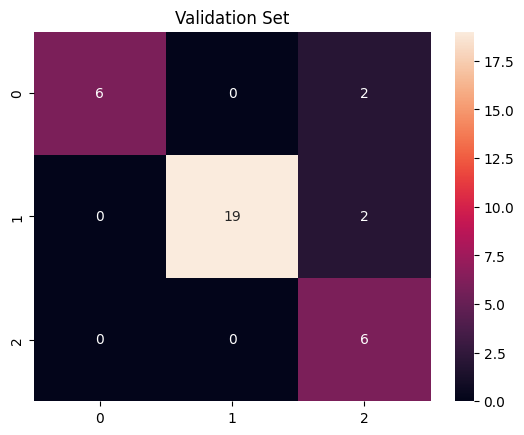

In [106]:
#Decision Tree
#Using knn splitted data Splitting it into validation set

x_train3,x_validation,y_train3,y_validation= train_test_split(x_train2,y_train2)
#making model
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=3,criterion='entropy')

a = dtree.fit(x_train3,y_train3)
#Prediction of data
Valid_prediction = a.predict(x_validation)

#Test Data prediction
prediction = a.predict(x_test2)

#Stats of both
print("Stats of valid prediction:\n",classification_report(y_validation,Valid_prediction))
print("Stats of test prediction:\n",classification_report(y_test2,prediction))

print("Accuracy of valid prediction: ",accuracy_score(y_validation,Valid_prediction))
print("Accuracy of Test prediction: ",accuracy_score(y_test2,prediction))

#Confusion Matrix
plt.title('Validation Set')
sns.heatmap(confusion_matrix(y_validation,Valid_prediction),annot=True)

plt.show()

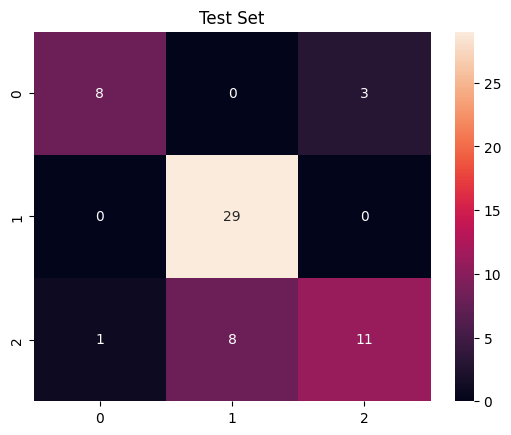

In [107]:
plt.title('Test Set')
sns.heatmap(confusion_matrix(y_test2,prediction),annot=True)
plt.show()

In [ ]:
#WE can see by correlation that as the pollution increase the ability to recover energy also increases
#TO reduce pollution we can decrease energy consumption co2 emmision also according to correlation matrix the more industrial waste the less is pollution.

